In [1]:
#Import libraries

import pandas as pd
import numpy as np
import pylab
import math

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from scipy import stats

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [6]:
#load the data
df = pd.read_csv('data/kc_house_data.csv')


In [7]:
df.shape

(21597, 21)

In [8]:
#checking data types to see if anything looks weird.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
#looking at basic stats to see anything out of place.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#Creating a data frame that removes all renovated homes.
df_nonreno = df[df.yr_renovated == 0]
df_nonreno = df_nonreno.dropna()
df_nonreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [11]:
#check for nulls
display(df_nonreno.isnull().any())
df_nonreno.shape

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

(15111, 21)

In [12]:
df_nonreno.sqft_basement.value_counts(normalize = True)

0.0       0.598769
?         0.020780
600.0     0.009662
500.0     0.009596
700.0     0.009397
            ...   
1284.0    0.000066
602.0     0.000066
2010.0    0.000066
1820.0    0.000066
875.0     0.000066
Name: sqft_basement, Length: 276, dtype: float64

In [13]:
for col in df_nonreno.columns:
    print(col)
    print(df_nonreno[col].value_counts(normalize = True, ascending = False).head(5))
    print ("-----------------------------------------------------------------")

id
5430300171    0.000132
6791200120    0.000132
705730280     0.000132
3333002450    0.000132
9353300600    0.000132
Name: id, dtype: float64
-----------------------------------------------------------------
date
6/25/2014    0.006485
6/23/2014    0.006419
4/27/2015    0.005824
7/8/2014     0.005824
4/28/2015    0.005757
Name: date, dtype: float64
-----------------------------------------------------------------
price
350000.0    0.008404
450000.0    0.007478
500000.0    0.007412
425000.0    0.007213
550000.0    0.006816
Name: price, dtype: float64
-----------------------------------------------------------------
bedrooms
3    0.454106
4    0.322546
2    0.126332
5    0.074184
6    0.011515
Name: bedrooms, dtype: float64
-----------------------------------------------------------------
bathrooms
2.50    0.258686
1.00    0.176362
1.75    0.141023
2.25    0.096354
2.00    0.085765
Name: bathrooms, dtype: float64
-----------------------------------------------------------------
sqft_livi

In [14]:
#Separating out continuous and categorical columns for future use
conts= []
cats= []

In [15]:
for col in df_nonreno.columns:
    if (df_nonreno[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [16]:
conts

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [17]:
cats

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated']

In [18]:
min_threshold, max_threshold = df_nonreno.price.quantile([0.25, 0.75])
min_threshold, max_threshold

#removing outliers with interquartile method


(320000.0, 633000.0)

In [19]:
df_1 = df_nonreno[(df_nonreno.price < max_threshold) & (df_nonreno.price > min_threshold)]

In [20]:
#checking to see that the shape is smaller due to outliers being removed
df_1.shape

(7491, 21)

In [22]:
df_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208


In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7491 entries, 3 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7491 non-null   int64  
 1   date           7491 non-null   object 
 2   price          7491 non-null   float64
 3   bedrooms       7491 non-null   int64  
 4   bathrooms      7491 non-null   float64
 5   sqft_living    7491 non-null   int64  
 6   sqft_lot       7491 non-null   int64  
 7   floors         7491 non-null   float64
 8   waterfront     7491 non-null   float64
 9   view           7491 non-null   float64
 10  condition      7491 non-null   int64  
 11  grade          7491 non-null   int64  
 12  sqft_above     7491 non-null   int64  
 13  sqft_basement  7491 non-null   object 
 14  yr_built       7491 non-null   int64  
 15  yr_renovated   7491 non-null   float64
 16  zipcode        7491 non-null   int64  
 17  lat            7491 non-null   float64
 18  long   

In [24]:
#removed objects

drop_these = ['date', 'sqft_basement']
df_1 = df_1.drop(columns=drop_these)

<AxesSubplot:>

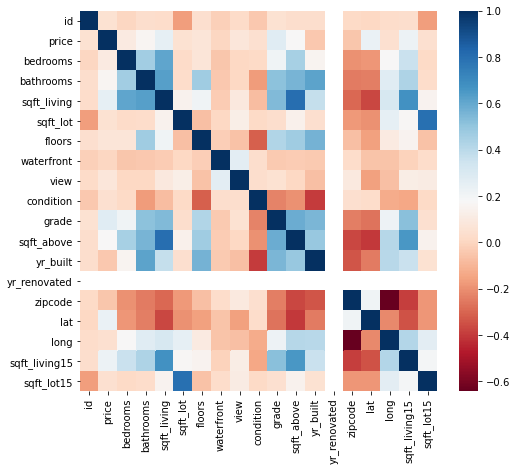

In [25]:
#Looking at the correlation between different columns to check for multicollinearity.

plt.figure(figsize = (8,7))
sns.heatmap(df_1.corr(), cmap = 'RdBu')

In [26]:
df_1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.056659,0.004121,0.034639,0.025553,-0.165792,0.041959,-0.019392,0.021346,-0.040975,0.055619,0.036088,0.032661,NaN,0.015513,0.008391,0.029236,0.031739,-0.162911
price,0.056659,1.000000,0.106822,0.165318,0.252715,0.051296,0.072567,-0.000308,0.077546,0.045041,0.281128,0.176156,-0.041730,NaN,-0.049164,0.234602,0.045780,0.228901,0.049203
bedrooms,0.004121,0.106822,1.000000,0.462938,0.611186,0.019985,0.072695,-0.045818,0.010356,0.018067,0.215316,0.450016,0.158096,NaN,-0.193724,-0.184313,0.172703,0.363531,0.015273
bathrooms,0.034639,0.165318,0.462938,1.000000,0.631960,0.026258,0.471278,-0.044868,0.006186,-0.172729,0.515910,0.559817,0.620815,NaN,-0.244827,-0.243928,0.279400,0.434738,0.025692
sqft_living,0.025553,0.252715,0.611186,0.631960,1.000000,0.141918,0.214653,-0.027826,0.090265,-0.076437,0.542593,0.802842,0.371787,NaN,-0.293408,-0.369280,0.318971,0.677466,0.152762
sqft_lot,-0.165792,0.051296,0.019985,0.026258,0.141918,1.000000,-0.068592,0.011661,0.121254,0.014330,0.036533,0.135133,0.042272,NaN,-0.174618,-0.194775,0.255549,0.169207,0.796371
floors,0.041959,0.072567,0.072695,0.471278,0.214653,-0.068592,1.000000,-0.020436,-0.059037,-0.313417,0.426208,0.468134,0.568841,NaN,-0.069846,-0.160437,0.103144,0.149924,-0.062579
waterfront,-0.019392,-0.000308,-0.045818,-0.044868,-0.027826,0.011661,-0.020436,1.000000,0.263465,0.033927,-0.032874,-0.027224,-0.038149,NaN,0.025652,-0.055424,-0.052705,-0.012451,0.025637
view,0.021346,0.077546,0.010356,0.006186,0.090265,0.121254,-0.059037,0.263465,1.000000,0.033990,0.050730,0.009180,-0.067971,NaN,0.097219,-0.155009,-0.067612,0.119362,0.112582
condition,-0.040975,0.045041,0.018067,-0.172729,-0.076437,0.014330,-0.313417,0.033927,0.033990,1.000000,-0.231374,-0.197242,-0.397166,NaN,0.040403,0.027916,-0.123296,-0.140629,0.014900


In [79]:
#eliminating multicolliniarity
#variance inflation factor
X1 = sm.tools.add_constant(df_1)
#create a series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index = X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

df_1_after = df_1.drop(['sqft_living', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis = 1)
X2 = sm.tools.add_constant(df_1_after)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index = X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const            0.000000
id               1.049796
price            1.468698
bedrooms         1.770805
bathrooms        2.729764
sqft_living      5.390402
sqft_lot         2.805551
floors           2.235684
waterfront       1.086284
view             1.189695
condition        1.258391
grade            2.203578
sqft_above       4.759870
yr_built         2.924689
yr_renovated          NaN
zipcode          1.844083
lat              1.530776
long             2.093570
sqft_living15    2.374556
sqft_lot15       2.809769
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const         0.000000
id            1.045592
price         1.419317
bedrooms      1.553060
bathrooms     2.382002
sqft_lot      1.183502
floors        1.862615
waterfront    1.085146
view          1.167629
condition     1.249164
grade         2.085986
sqft_above    2.599108
yr_built      2.919525
zipcode       1.819457
lat           1.501187
long          2.052895
dtype: float64

/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


<function matplotlib.pyplot.show(close=None, block=None)>

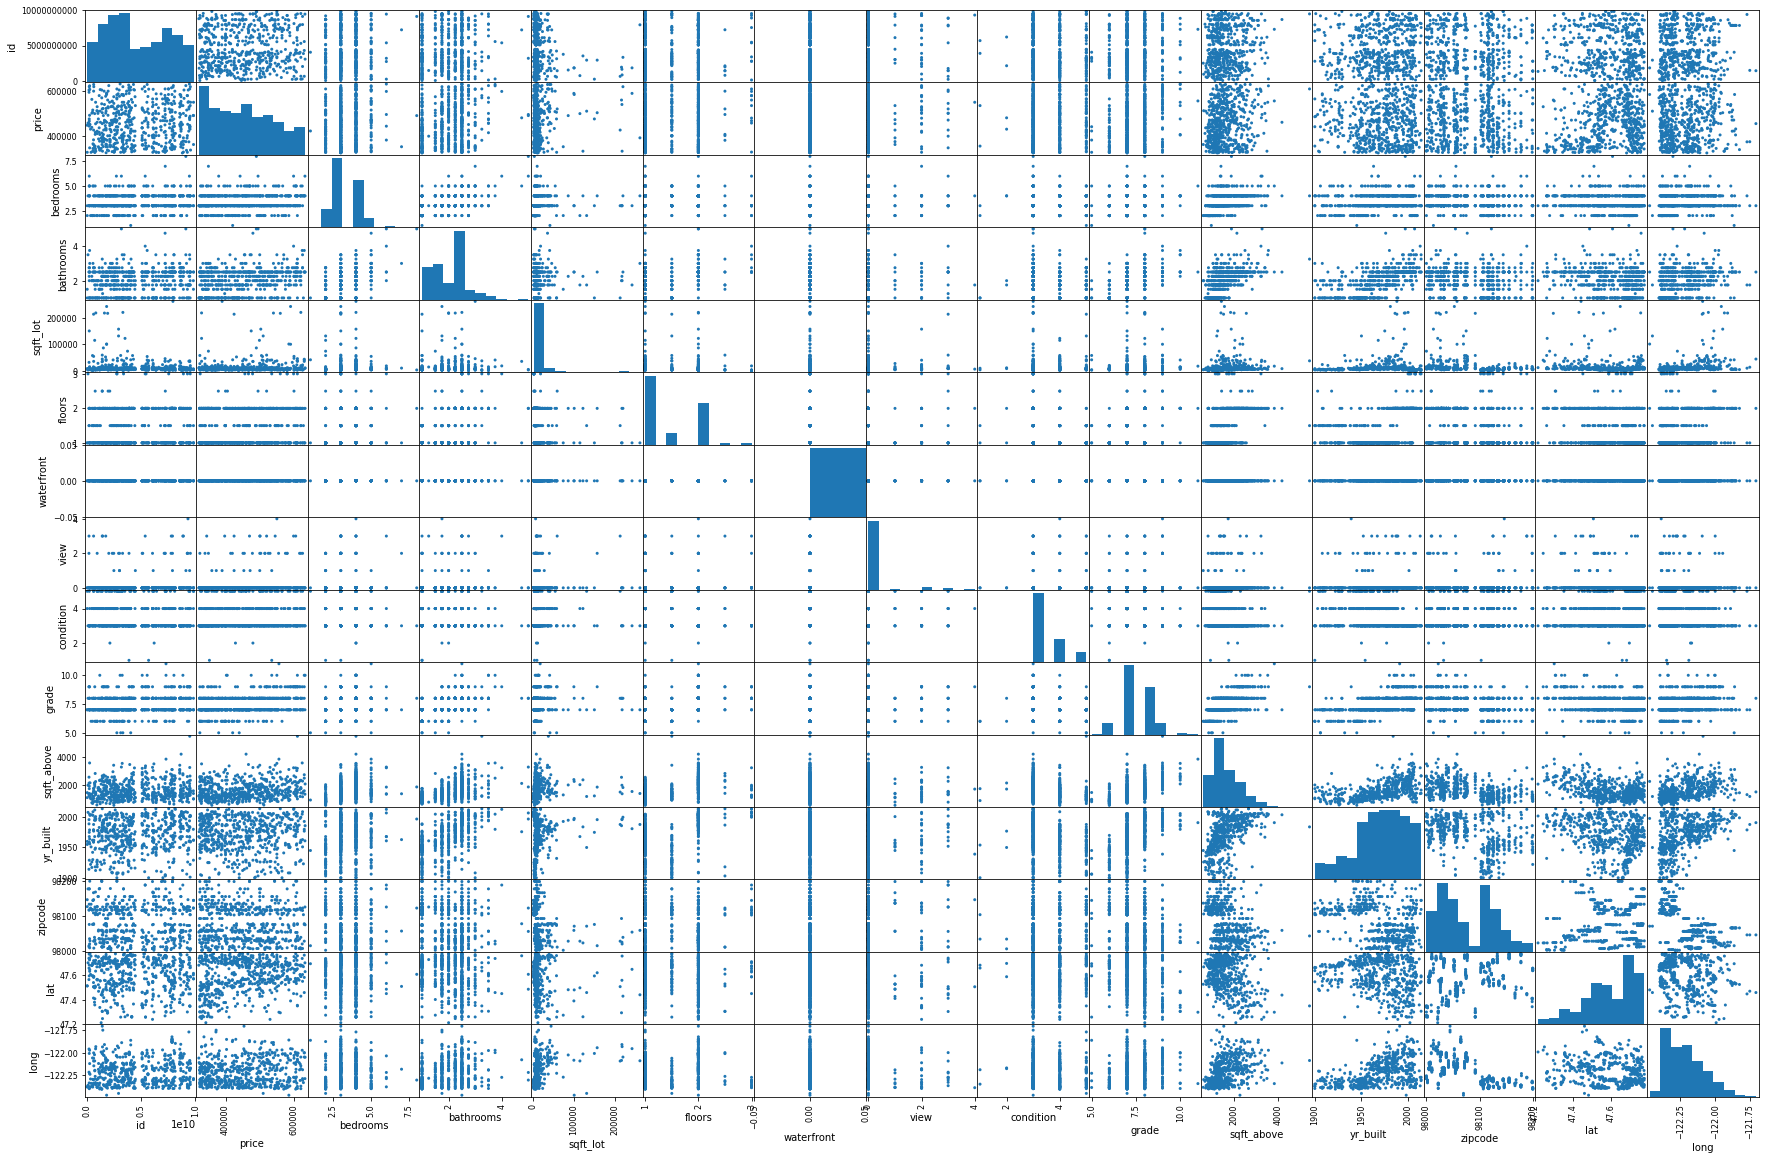

In [80]:
#Not the greatest representation of the data because most of it is categorical and so the data looks stagnant.

pd.plotting.scatter_matrix(df_1_after.iloc[200:800], alpha =1,  figsize = (30,20))
plt.show

In [98]:
X = df_1_after.drop('price', axis = 1)
y = df_1_after[['price']]

#Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#create instance of our model
regression_model = LinearRegression()


In [99]:
#fit the model
regression_model.fit(X_train, y_train)

LinearRegression()

In [100]:
#Exploring the intercept and coefficient

intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print('The intercept for our model is {:.4}'.format(intercept))
print('-'*100)

#Loop through the dictionary and print the coeffcient data
#so, for instance, for each unit in sqft_above, there is a 9.4% rise in price.
for coef in zip(X.columns, regression_model.coef_[0]):
    print('The Coefficient for {} is {:.2}'.format(coef[0], coef[1]))

The intercept for our model is -1.667e+06
----------------------------------------------------------------------------------------------------
The Coefficient for id is 1.4e-06
The Coefficient for bedrooms is -5.5e+02
The Coefficient for bathrooms is 2.2e+04
The Coefficient for sqft_lot is 0.22
The Coefficient for floors is 8.1e+03
The Coefficient for waterfront is 2.5e+04
The Coefficient for view is 1.4e+04
The Coefficient for condition is 7.9e+03
The Coefficient for grade is 4.4e+04
The Coefficient for sqft_above is 1.8e+01
The Coefficient for yr_built is -1.1e+03
The Coefficient for zipcode is -3.7e+01
The Coefficient for lat is 2.6e+05
The Coefficient for long is 4.1e+04


In [101]:
#get predictions
y_predict = regression_model.predict(X_test)
#first five
y_predict[:5]

array([[478291.87511027],
       [413443.45140456],
       [412278.93851959],
       [439879.95448011],
       [362379.88930159]])

In [102]:
import statsmodels.stats.diagnostic as sm_diagnostic

In [103]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
est = model.fit()

In [104]:
#Heteroscedasticity checks

_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)


4.319564121999334e-23 2.5220140744087313e-23


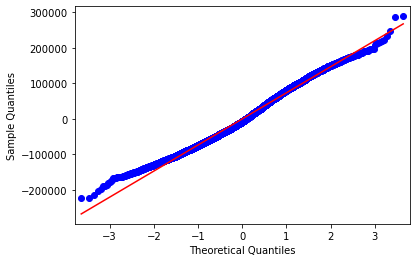

1.1841455100773333e-05

In [105]:
#check for the normality of the residuals
sm.qqplot(est.resid, line = 's')
pylab.show()

#check that the mean of the residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

In [106]:
#calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)
#calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

#calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

#display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 5.61e+09
MAE 6.14e+04
RMSE 7.49e+04


In [107]:
#R2
model_r2 = r2_score(y_test, y_predict)
model_r2

0.2843521773176987

In [108]:
est.conf_int()

,0,1
const,-4.451413e+06,3.248204e+06
id,7.585694e-07,1.946452e-06
bedrooms,-3.698940e+03,1.138179e+03
bathrooms,2.099561e+04,2.882056e+04
sqft_lot,1.679977e-01,2.730547e-01
floors,5.233026e+03,1.338254e+04
waterfront,-1.706905e+04,6.947712e+04
view,1.059050e+04,1.723185e+04
condition,4.595066e+03,1.050163e+04
grade,3.908318e+04,4.475738e+04


In [109]:
est.pvalues

const          7.593615e-01
id             8.165674e-06
bedrooms       2.994111e-01
bathrooms      2.164345e-35
sqft_lot       2.195886e-16
floors         7.654281e-06
waterfront     2.352459e-01
view           2.539081e-16
condition      5.558567e-07
grade         6.357128e-175
sqft_above     8.196887e-18
yr_built      6.057471e-123
zipcode        2.591844e-02
lat           2.182073e-266
long           2.274079e-06
dtype: float64

In [110]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     223.9
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:20:23   Log-Likelihood:                -94544.
No. Observations:                7491   AIC:                         1.891e+05
Df Residuals:                    7476   BIC:                         1.892e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.016e+05   1.96e+06     -0.306      0.7

In [94]:
#looking for relationships

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98040'),
 Text(25, 0, '98042'),
 Text(26, 0, '98045'),
 Text(27, 0, '98052'),
 Text(28, 0, '98053'),
 Text(29, 0, '98055'),
 Text(30, 0, '98056'),
 Text(31, 0, '98058'),
 Text(32, 0, '98059'),
 Text(33, 0, '98065'),
 Text(34, 0, '98070'),
 Text(35, 0, '98072'),
 Text(36, 0, '98074'),
 Text(37, 0, '98075'),
 Text(38, 0, '98077'),
 Text(39, 0, '98092'),
 Text(40, 0, '98102'),
 Text(41, 0, '98103'),
 Text(42, 0, '98105'),
 Text(43, 0, '98106')

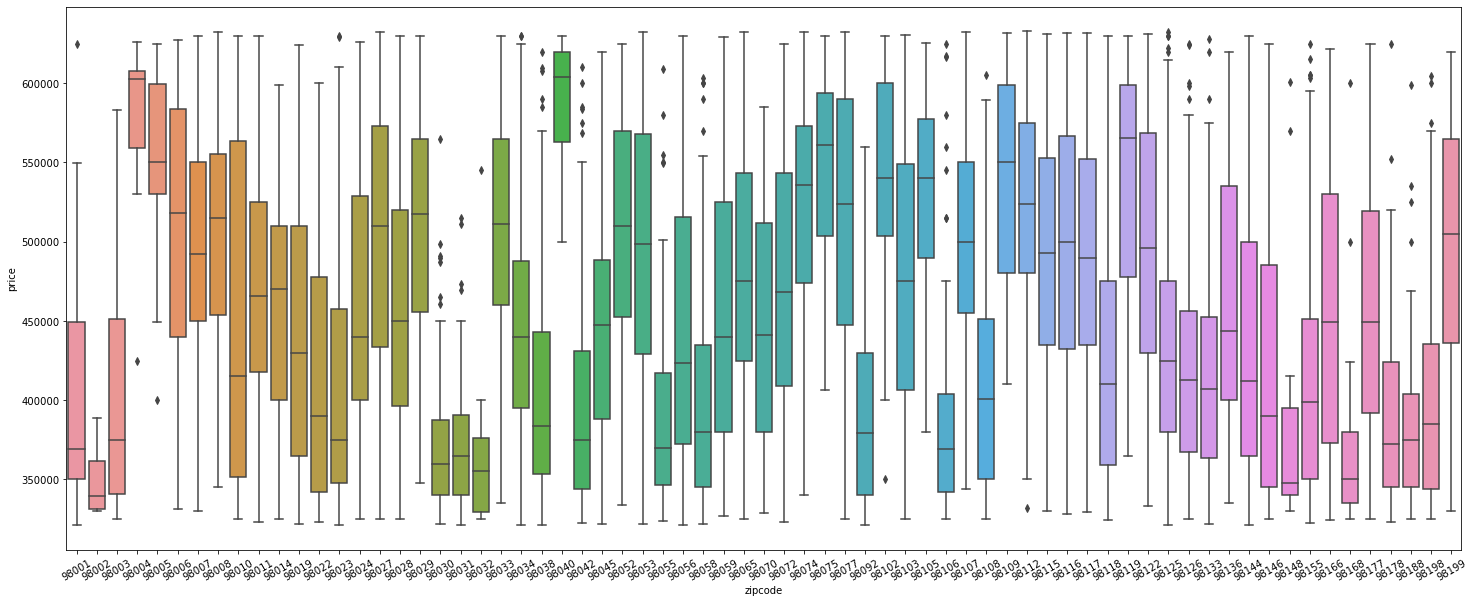

In [95]:
plt.figure(figsize=(25,10))
g = sns.boxplot(x = 'zipcode', y = 'price', data = df_1)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

<AxesSubplot:xlabel='grade', ylabel='yr_built'>

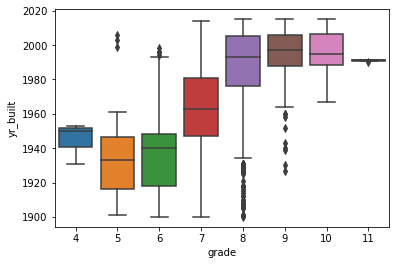

In [96]:
sns.boxplot(x = 'grade', y = 'yr_built', data = df_1)

In [97]:
outcome = "price"

In [37]:
x_cols = df_1.dropna().drop(["price", "id","sqft_above", "sqft_living15", "lat", "long", "sqft_lot"], axis = 1).columns

In [38]:
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_lot15'],
      dtype='object')

In [39]:
predictors = '+'.join(x_cols)

In [40]:
predictors

'bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+sqft_lot15'

In [41]:
f = outcome + '~' + predictors

In [42]:
f

'price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+sqft_lot15'

In [43]:
model = ols(formula = f, data= df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          2.06e-299
Time:                        10:07:27   Log-Likelihood:                -95142.
No. Observations:                7491   AIC:                         1.903e+05
Df Residuals:                    7479   BIC:                         1.904e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.324e+06   2.05e+06      4.054      0.000     4.3e+06    1.23e+07
bedrooms     -6964.4441   1422.425     -4.896      0.000   -9752.797   -4176.091
bathrooms     1.977e+04   2289.673      8.635      0.000    1.53e+04    2.43e+04
sqft_living     19.2645      2.343      8.222      0.000      14.671      23.858
floors        1.169e+04   2137.174      5.468      0.000    7496.581    1.59e+04
waterfront   -6834.0603   2.39e+04     -0.286      0.775   -5.36e+04    3.99e+04
view          4064.9144   1816.421      2.238      0.025     504.219    7625.609
condition     3096.6506   1624.599      1.906      0.057     -88.020    6281.321
grade         3.584e+04   1577.302     22.722      0.000    3.27e+04    3.89e+04
yr_built     -1207.3666     50.463    -23.926      0.000   -1306.288   -1108.445
yr_renovated  7.262e-12    2.8e-12      2.595      0.009    1.78e-12    1.27e-11
zipcode        -59.5115     20.626     -2.885      0.004     -99.945     -19.078
sqft_lot15       0.0918      0.036      2.583      0.010       0.022       0.161
==============================================================================
Omnibus:                      553.405   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.370
Skew:                           0.159   Prob(JB):                     1.26e-46
Kurtosis:                       2.241   Cond. No.                     1.86e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""